***
# <font color=green size=10>Descriptive Data Analysis Project</font>
***

Using the knowledge of Statistics 1, carry out a basic descriptive analysis of a dataset taken from the 2015 Brazilian National Household Sample Survey (PNAD) by IBGE.

We will build histograms, calculate and evaluate measures of central tendency, measures of position (quantiles), and measures of dispersion.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [138]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [89]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [90]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [91]:
df.shape

(76840, 7)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [93]:
df.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [94]:
mg = 788 #minimal wage
classes = [0, 2*mg, 5*mg, 15*mg, 25*mg, df.Renda.max()]

### 2º Definir os labels das classes

In [95]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [96]:
frequency = pd.cut(df.Renda, classes, labels=labels).value_counts().reindex(labels)

In [97]:
frequency

,count
Renda,
E,46888
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [98]:
percentage = pd.cut(df.Renda, classes, labels=labels).value_counts(normalize=True).reindex(labels)
percentage = percentage*100

In [99]:
percentage

,proportion
Renda,
E,63.385289
D,25.147013
C,9.788707
B,1.111216
A,0.567775


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [100]:
classes_table = pd.DataFrame({'Frequency' : frequency, 'Percentage (%)' : percentage})
classes_table.rename_axis('Class', inplace=True)
classes_table.reset_index(inplace=True)
classes_table

,Class,Frequency,Percentage (%)
0,E,46888,63.385289
1,D,18602,25.147013
2,C,7241,9.788707
3,B,822,1.111216
4,A,420,0.567775


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

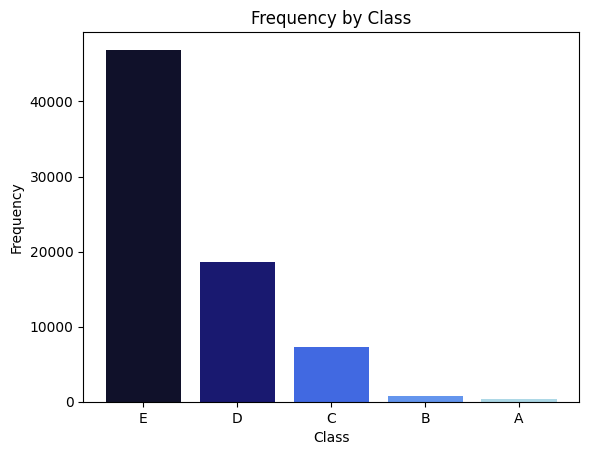

In [101]:
plt.bar(classes_table['Class'], classes_table['Frequency'], color=['#10112A', '#191970', '#4169E1', '#6495ED', '#ADD8E6'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency by Class')
plt.show()

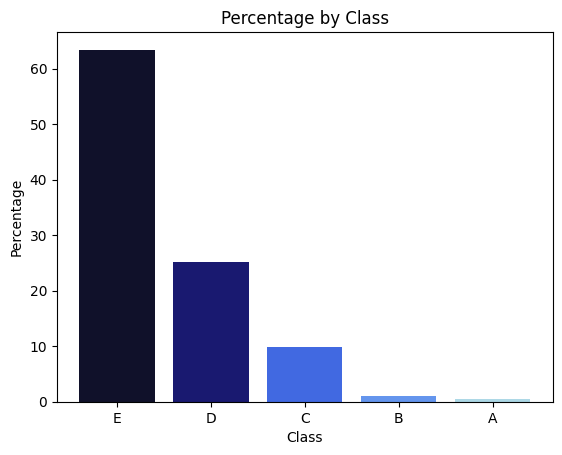

In [102]:
plt.bar(classes_table['Class'], classes_table['Percentage (%)'], color=['#10112A', '#191970', '#4169E1', '#6495ED', '#ADD8E6'])
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage by Class')
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [103]:
df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

Quantitative variables: Idade, Anos de Estudo, Renda, Altura <br>
Qualitative variables: UF, Sexo, Cor

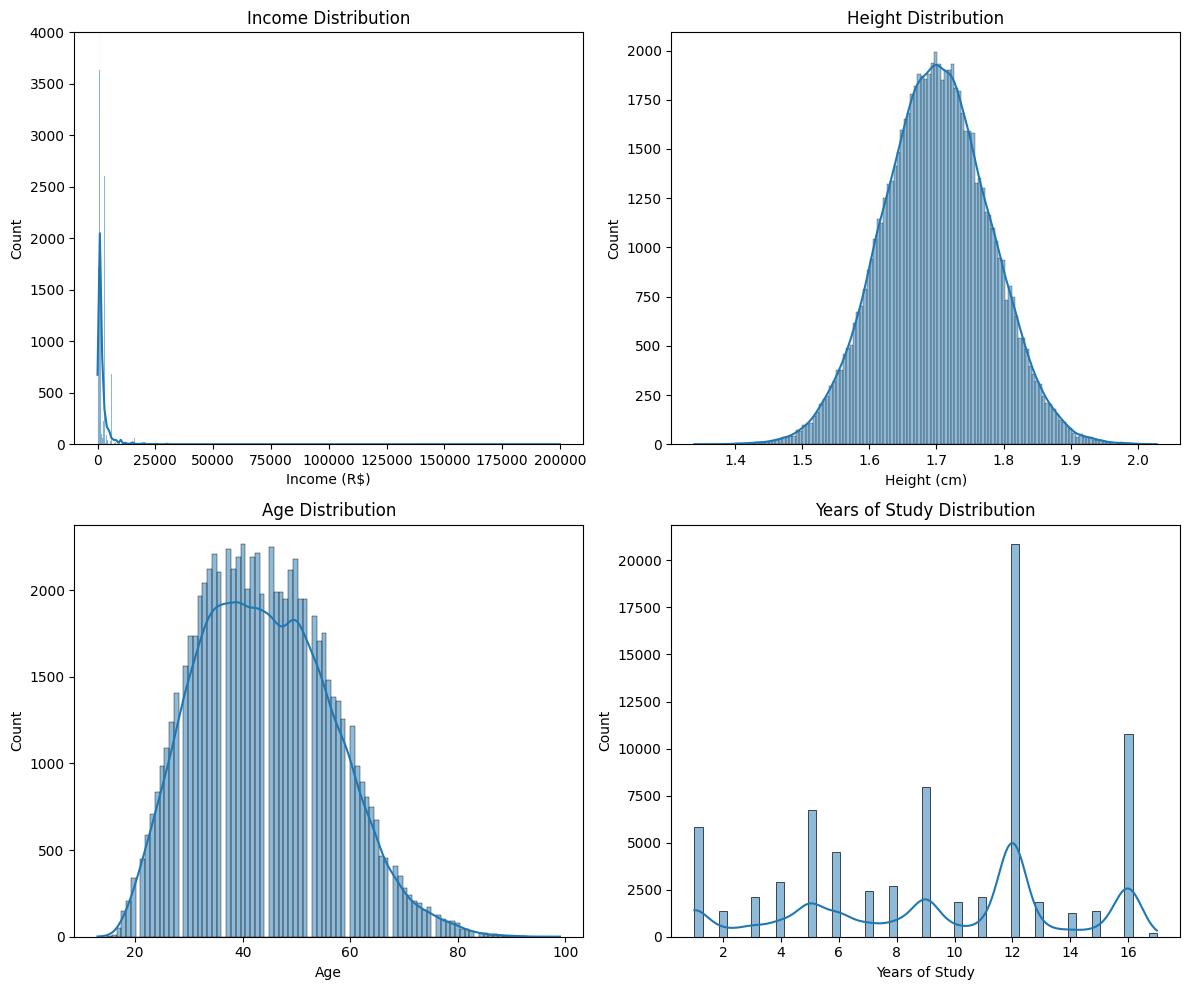

In [104]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Flatten the axes array for easy indexing
axes = axes.flatten()


sns.histplot(df.Renda, kde=True, ax=axes[0])
axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Income (R$)')
axes[0].set_ylim(0, 4000)

sns.histplot(df.Altura, kde=True, ax=axes[1])
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (cm)')

sns.histplot(df.Idade, kde=True, ax=axes[2])
axes[2].set_title('Age Distribution')
axes[2].set_xlabel('Age')

sns.histplot(df['Anos de Estudo'], kde=True, ax=axes[3])
axes[3].set_title('Years of Study Distribution')
axes[3].set_xlabel('Years of Study')

plt.tight_layout()
plt.show()


### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

(0.0, 4000.0)

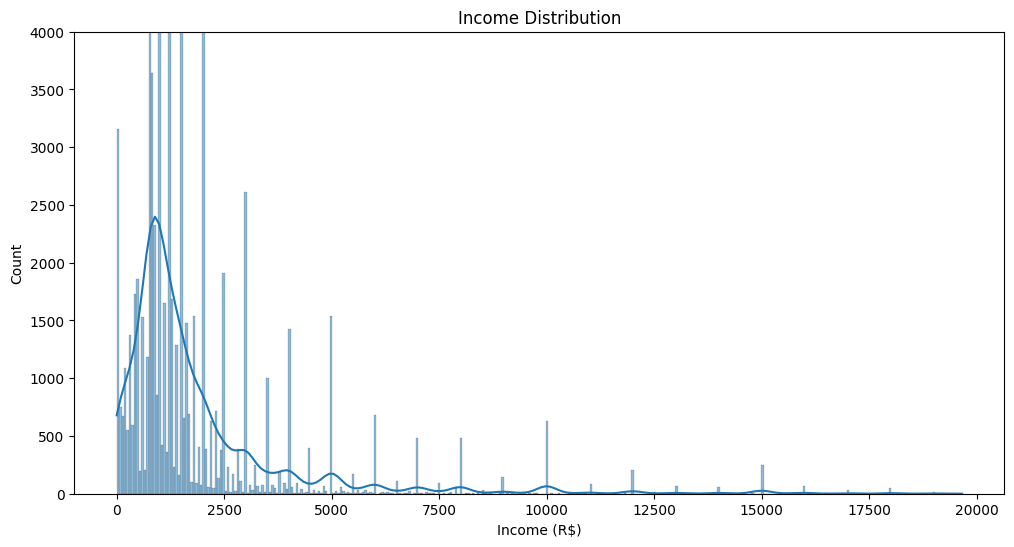

In [105]:
ax = sns.histplot(df.query('Renda < 20000').Renda, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Income Distribution')
ax.set_xlabel('Income (R$)')
ax.set_ylim(0, 4000)

> ### Conclusões

Escreva suas conclusões aqui...

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [208]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [107]:
income_mean = df.Renda.mean()
income_mean

np.float64(2000.3831988547631)

### Obtenha a mediana

In [108]:
income_median = df.Renda.median()
income_median

1200.0

### Obtenha a moda

In [109]:
income_mode = df.Renda.mode()
income_mode

,Renda
0,788


### Obtenha o desvio médio absoluto

In [114]:
aad = (df.Renda - df.Renda.mean()).abs().mean() #absolute average deviation
aad

np.float64(1526.4951371638058)

### Obtenha a variância

In [115]:
df.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [116]:
df.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [123]:
avg_income_masc = df.query('Sexo == 0').Renda.mean()
avg_income_fem = df.query('Sexo == 1').Renda.mean()

med_income_masc = df.query('Sexo == 0').Renda.median()
med_income_fem = df.query('Sexo == 1').Renda.median()

max_income_masc = df.query('Sexo == 0').Renda.max()
max_income_fem = df.query('Sexo == 1').Renda.max()

print(avg_income_masc, avg_income_fem)
print(med_income_masc, med_income_fem)
print(max_income_masc, max_income_fem)

2192.4415962441312 1566.84739296312
1350.0 900.0
200000 120000


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [217]:
sex_ethnicity = pd.crosstab(
    df.Cor,
    df.Sexo,
    values=df.Renda,
    aggfunc={'mean', 'median', 'max'}
)

sex_ethnicity.rename(index=cor, inplace=True)
sex_ethnicity.rename(columns=sexo, inplace=True)
sex_ethnicity

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

In [218]:
sex_ethnicity_2 = pd.crosstab(
    df.Cor,
    df.Sexo,
    values=df.Renda,
    aggfunc={ 'var', 'std'}
)

sex_ethnicity_2.rename(index=cor, inplace=True)
sex_ethnicity_2.rename(columns=sexo, inplace=True)
sex_ethnicity_2

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

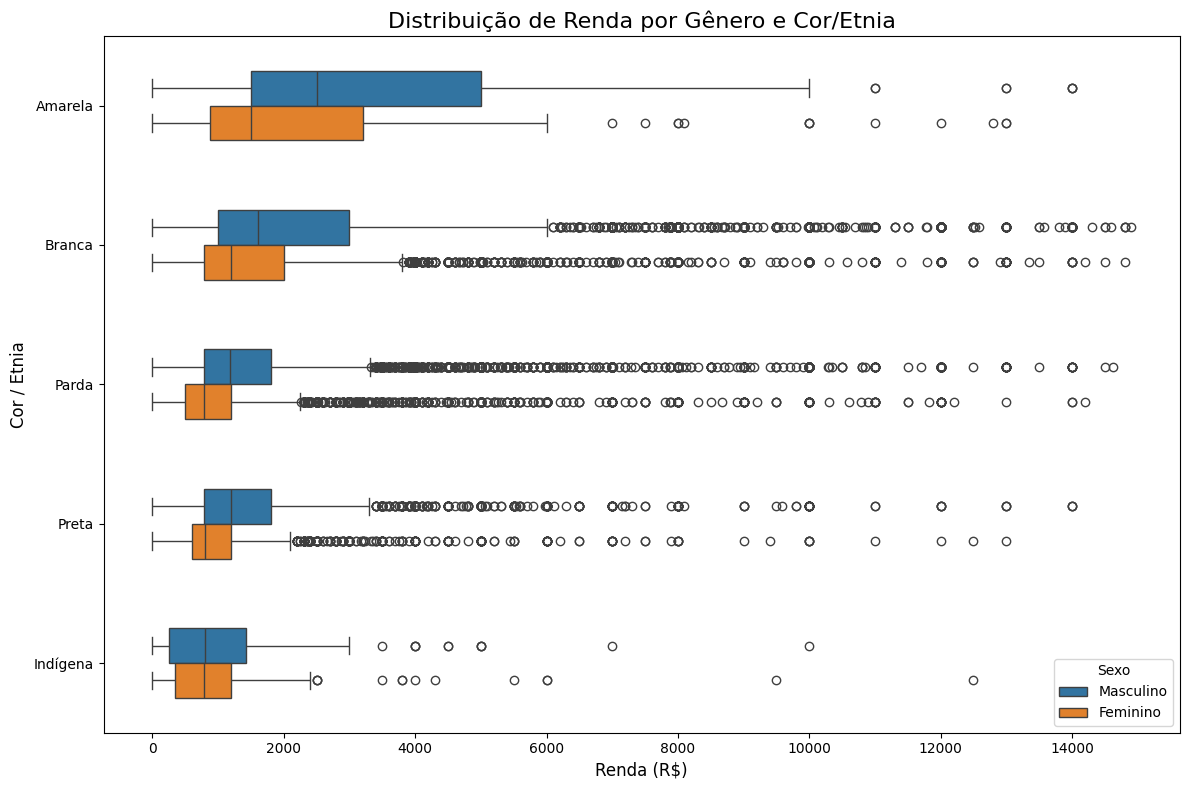

In [220]:


# Filter and recode DataFrame
filtered = df.query('Renda < 15000').copy()
filtered['Cor'] = filtered['Cor'].replace(cor)
filtered['Sexo'] = filtered['Sexo'].replace(sexo)

order = filtered.groupby('Cor')['Renda'].median().sort_values(ascending=False).index

# Set figure size
plt.figure(figsize=(12, 8))

# Create the boxplot with reduced box width.
ax = sns.boxplot(
    data=filtered,
    x='Renda',
    y='Cor',
    hue='Sexo',
    orient='h',
    order = order,
    width=0.5  # Decrease the width to create more spacing between groups
)

# Set title and labels
ax.set_title('Distribuição de Renda por Gênero e Cor/Etnia', fontsize=16)
ax.set_xlabel('Renda (R$)', fontsize=12)
ax.set_ylabel('Cor / Etnia', fontsize=12)

plt.tight_layout()
plt.show()


> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [225]:
percentual = stats.percentileofscore(df.Renda, 788, kind = 'weak')
print(("{0:.2f}%").format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [227]:
max_income_99 = df.Renda.quantile(0.99)
print("{0:.2f} R$".format(max_income_99))

15000.00 R$


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [154]:
income_study_sex = pd.crosstab(
    df['Anos de Estudo'],
    df.Sexo,
    values=df.Renda,
    aggfunc=['mean', 'median', 'max', 'std']
)

income_study_sex.rename(columns=sexo, inplace=True)
income_study_sex

mean                 median                max  \
Sexo              Masculino     Feminino Masculino Feminino Masculino   
Anos de Estudo                                                          
1                799.494638   516.201748     700.0    390.0     30000   
2                895.629047   492.771987     788.0    400.0     30000   
3                931.178986   529.911638     788.0    450.0     40000   
4               1109.203862   546.853916     800.0    500.0     80000   
5               1302.329283   704.279111    1000.0    788.0     50000   
6               1338.653218   781.389776    1045.0    788.0     35000   
7               1448.875419   833.732824    1200.0    788.0     25000   
8               1465.497940   830.751004    1200.0    788.0     40000   
9               1639.396667   933.615351    1300.0    800.0     30000   
10              1508.038850   868.021700    1200.0    788.0     60000   
11              1731.270847   925.919225    1218.0    800.0     45000   
12              2117.060504  1286.790889    1500.0   1000.0    200000   
13              2470.330776  1682.313725    1800.0   1200.0     30000   
14              3195.099154  1911.730047    2400.0   1300.0     25000   
15              3706.620269  2226.460457    2500.0   1600.0     50000   
16              6134.279790  3899.513231    4000.0   2800.0    200000   
17              1295.761905   798.174419    1200.0    788.0      7000   

                                 std               
Sexo           Feminino    Masculino     Feminino  
Anos de Estudo                                     
1                 10000  1023.904884   639.311534  
2                  2000  1331.950552   425.291842  
3                  4000  1435.173827   498.234168  
4                  3500  2143.800133   424.124446  
5                 10000  1419.821787   629.553397  
6                  8000  1484.650587   635.782641  
7                  6000  1476.628602   574.547028  
8                  9000  1419.708673   602.038029  
9                 18000  1515.583715   896.781213  
10                20000  2137.664774   973.221652  
11                 6000  2078.609734   620.611907  
12               100000  2676.538942  1819.040417  
13               120000  2268.081538  4851.833513  
14                20000  2797.116800  2053.789771  
15                20000  3987.214974  2064.083336  
16               100000  7447.613594  4212.770709  
17                 3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

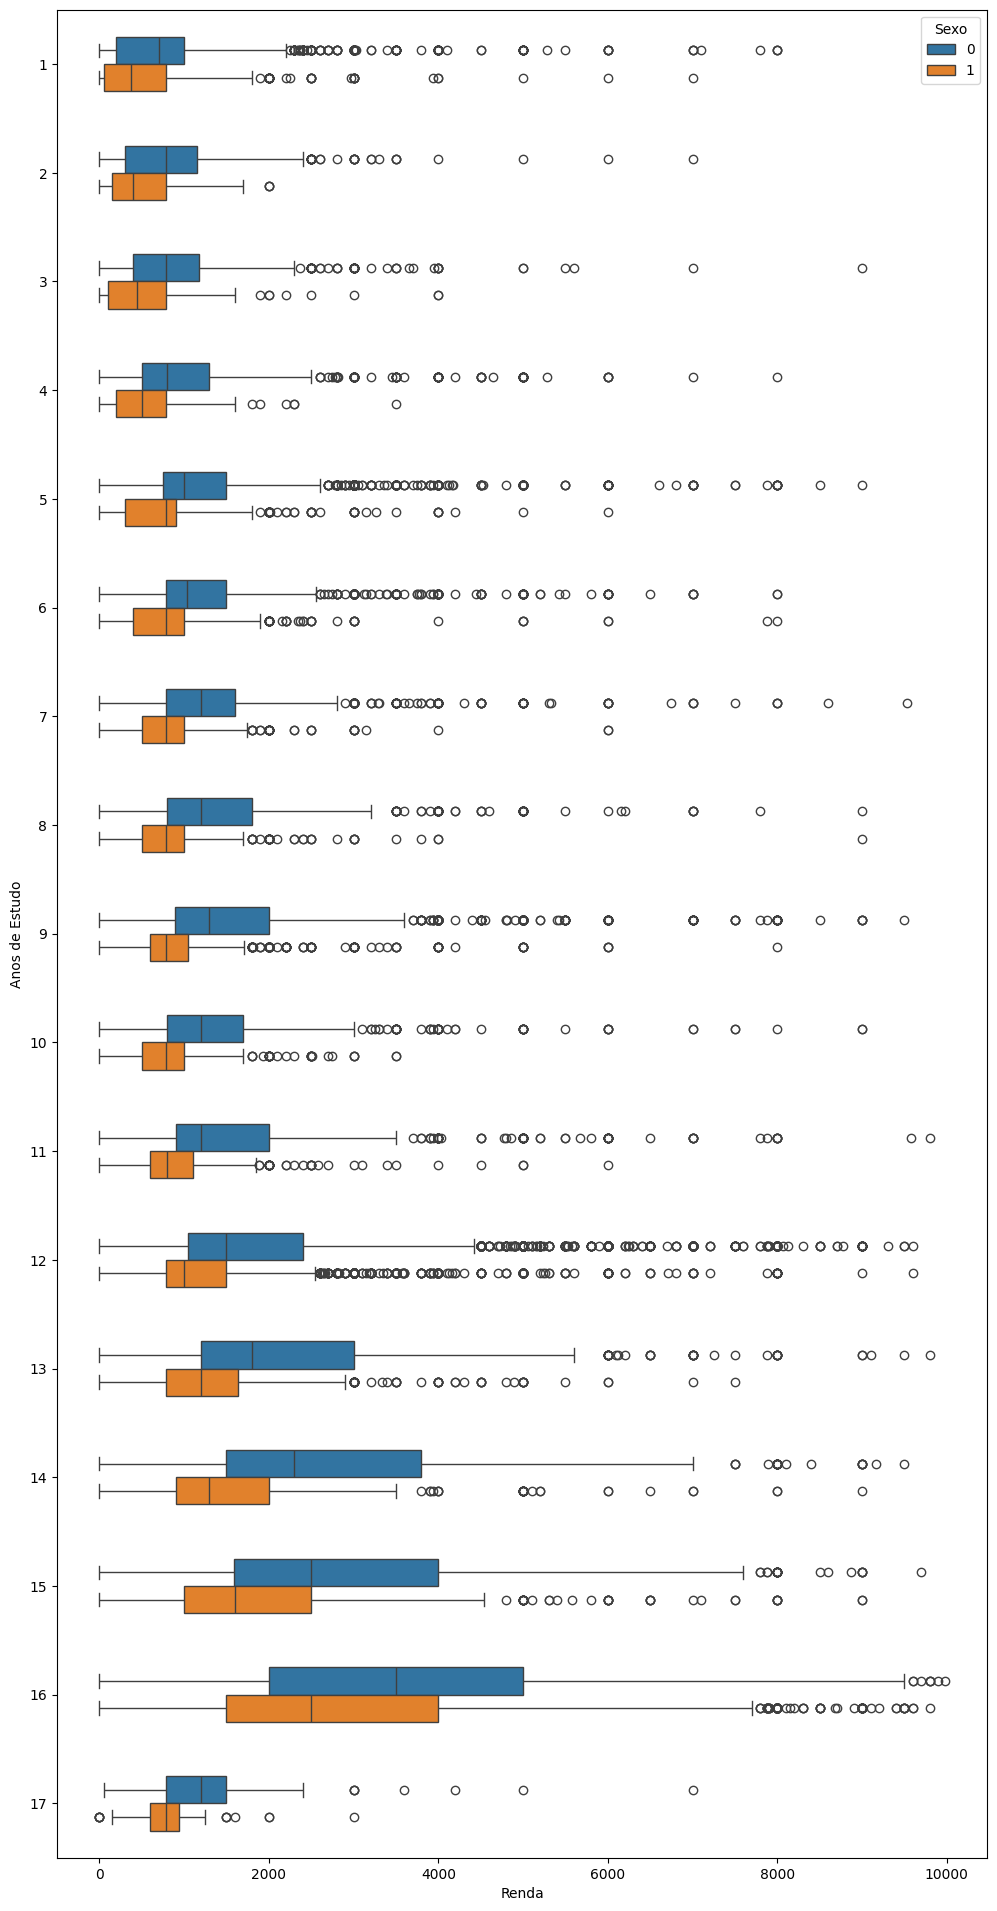

In [158]:
plt.figure(figsize=(12, 24))

ax = sns.boxplot(
    data=df.query('Renda < 10000'),
    x='Renda',
    y='Anos de Estudo',
    hue='Sexo',
    orient='h',
    width=0.5
)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='white'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [168]:
income_states = df.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
income_states.sort_values(by=('Renda', 'mean'), ascending=False, inplace=True)
income_states.rename(index = uf, inplace = True)

In [169]:
income_states

Renda                             
                            mean  median     max          std
UF                                                           
Distrito Federal     4241.954722  2000.0  100000  5550.463338
São Paulo            2638.104986  1600.0   80000  3503.777366
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Amapá                1861.353516  1200.0   15580  2020.688632
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Tocantins            1771.094946  1000.0   60000  2934.590741
Pernambuco           1527.079319   900.0   50000  2389.622497
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Pará                 1399.076871   850.0   50000  2053.779555
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Ceará                1255.403692   789.0   25000  1821.963536
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Piauí                1074.550784   750.0   40000  2373.355726
Maranhão             1019.432009   700.0   30000  1887.816905

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [172]:
sns.boxplot?

<ipython-input-188-2d2ad3650170>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.replace(uf, inplace=True)


In [189]:
filtered.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,0,Ceará,8,Acre,800,1.603808
1,Rondônia,1,Ceará,2,Acre,1150,1.739790
2,Rondônia,1,São Paulo,8,Pará,880,1.760444
3,Rondônia,0,46,2,6,3500,1.783158
4,Rondônia,1,47,8,9,150,1.690631


In [204]:
filtered

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [199]:
order

Index([53, 42, 35, 41, 51, 43, 52, 33, 50, 16, 11, 32, 31, 14, 17, 13, 12, 26,
       15, 29, 24, 23, 27, 28, 25, 22, 21],
      dtype='int64', name='UF')

<ipython-input-209-019d44695fd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['UF'] = filtered['UF'].replace(uf)


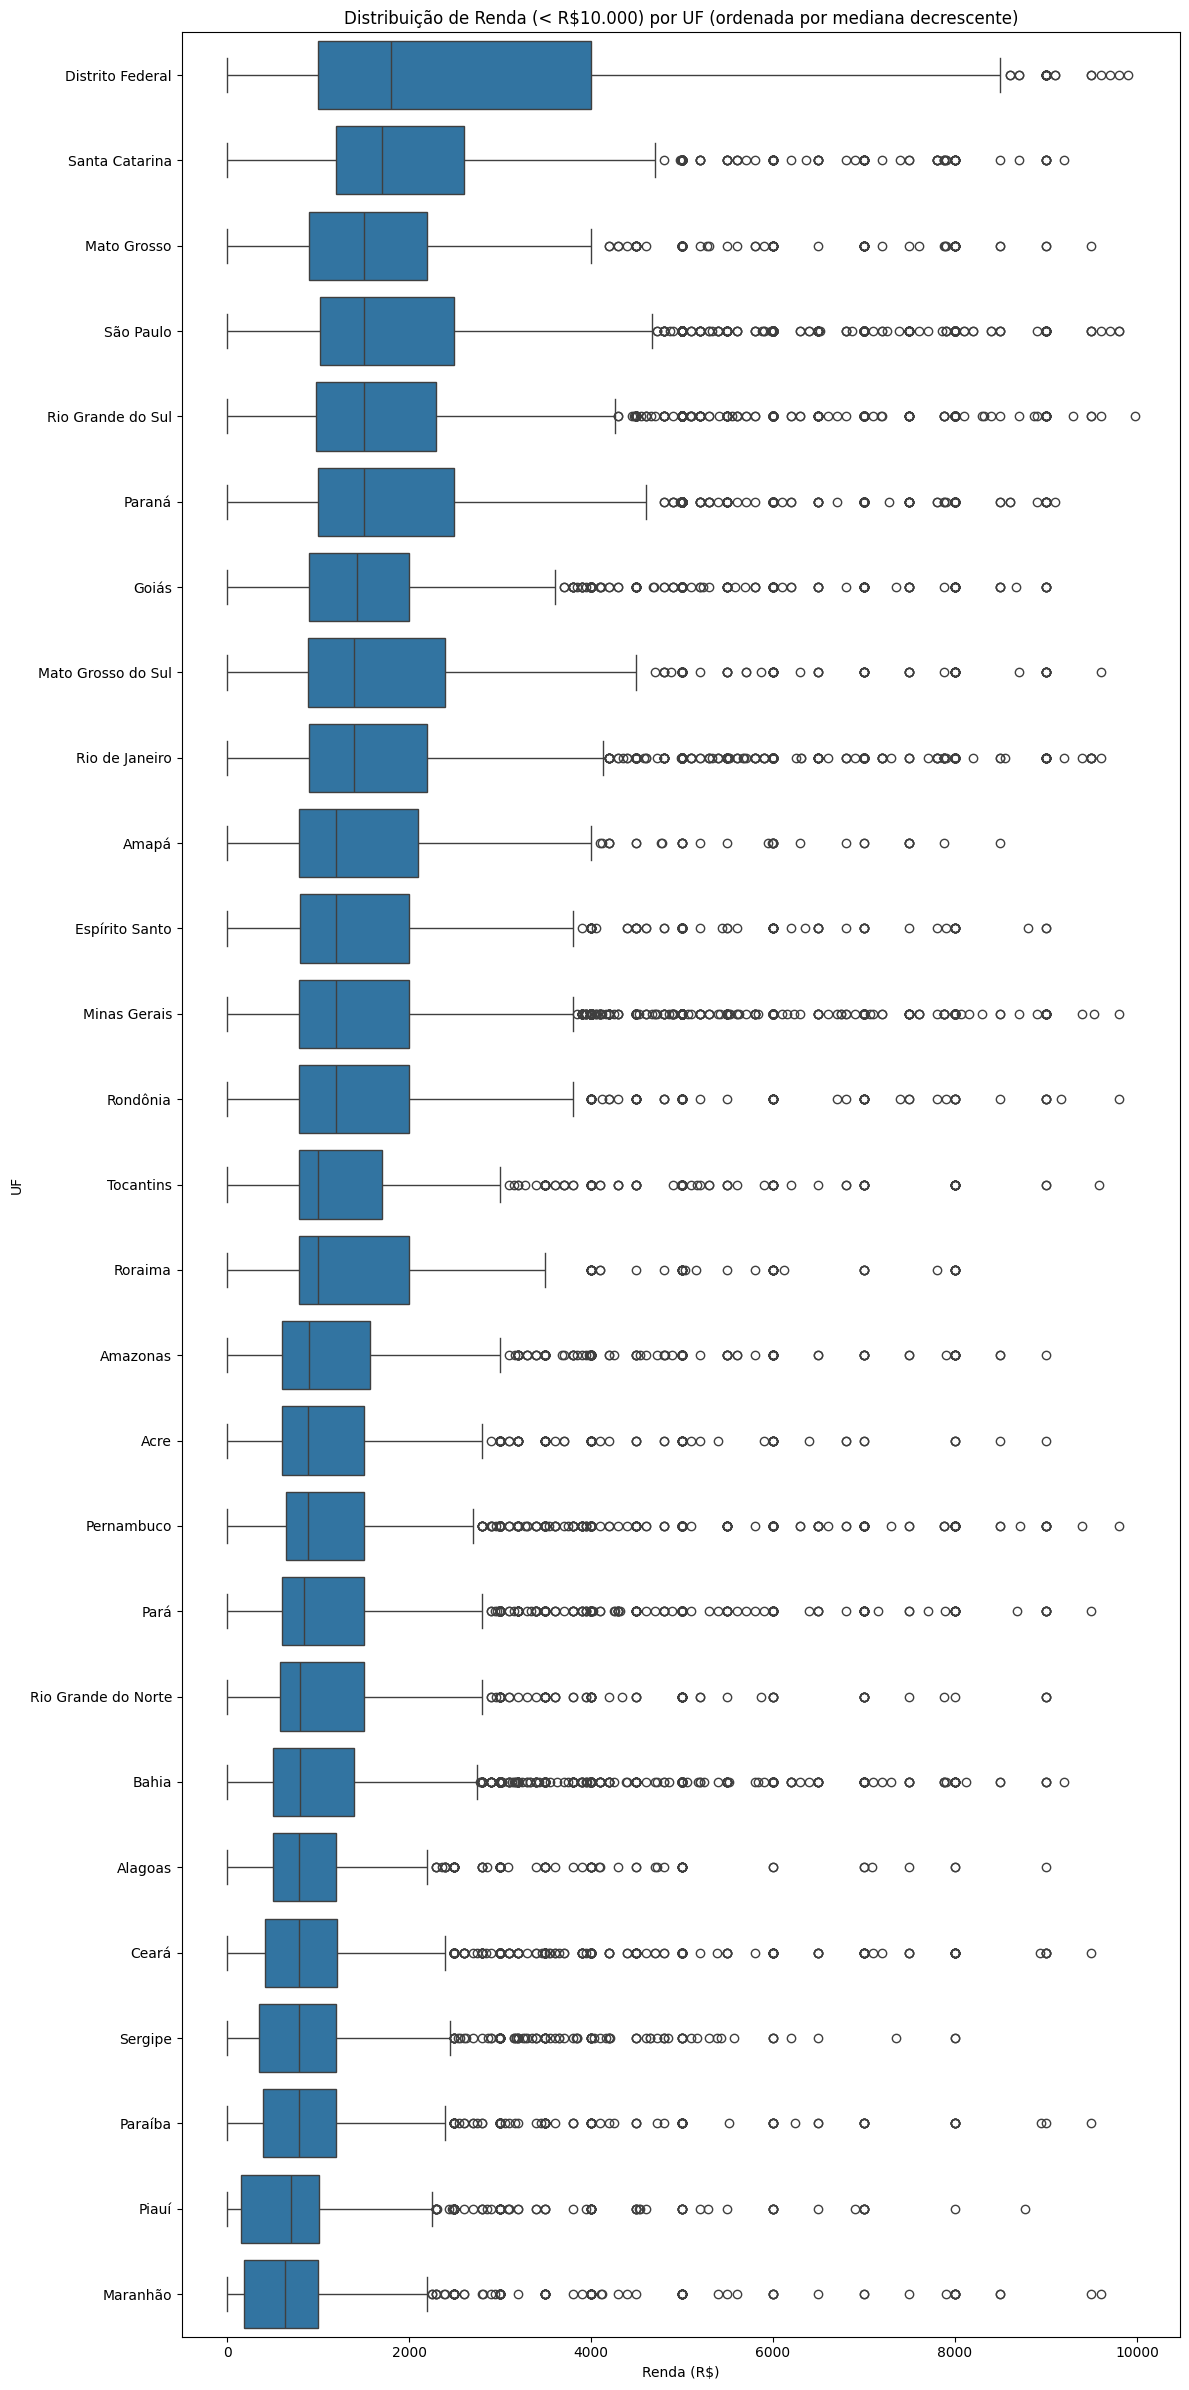

In [209]:
filtered = df.query('Renda < 10000')
filtered['UF'] = filtered['UF'].replace(uf)

# Compute the median income by state ("UF") and sort descending
order = filtered.groupby('UF')['Renda'].median().sort_values(ascending=False).index


# Set figure size before plotting
plt.figure(figsize=(12, 24))

# Create the boxplot with the custom order
ax = sns.boxplot(
    data= filtered,
    x='Renda',
    y='UF',
    orient='h',
    order = order # categories will be ordered by descending median Renda
)

ax.set_title('Distribuição de Renda (< R$10.000) por UF (ordenada por mediana decrescente)')
ax.set_xlabel('Renda (R$)')
ax.set_ylabel('UF')

plt.tight_layout()
plt.show()


> ### Conclusões

Escreva suas conclusões aqui...